# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [63]:
df = pd.read_csv('new_archive_ok.csv')
pd.set_option('display.max_columns', None)
colunas_convert = ['mau', 'sexo_M', 'posse_de_veiculo_Y',	'posse_de_imovel_Y',	'tipo_renda_Pensioner',	'tipo_renda_State servant',	'tipo_renda_Student',	'tipo_renda_Working',	'educacao_Higher education',	'educacao_Incomplete higher',	'educacao_Lower secondary',	'educacao_Secondary / secondary special',	'estado_civil_Married',	'estado_civil_Separated',	'estado_civil_Single / not married',	'estado_civil_Widow',	'tipo_residencia_House / apartment',	'tipo_residencia_Municipal apartment',	'tipo_residencia_Office apartment',	'tipo_residencia_Rented apartment',	'tipo_residencia_With parents']
df[colunas_convert]=df[colunas_convert].astype(int)
df_y = df[['mau']]
df_x = df.drop('mau',axis=1)

In [67]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

[Text(0.6247442248018321, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Bom'),
 Text(0.3727426146881527, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Bom'),
 Text(0.232954376898614, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Bom'),
 Text(0.05999620277197646, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Bom'),
 Text(0.04404784507309664, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Bom'),
 Text(0.03037782418834251, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Bom'),
 Text(0.012151129675337003, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Bom'),
 Text(0.006075564837668502, 0.722

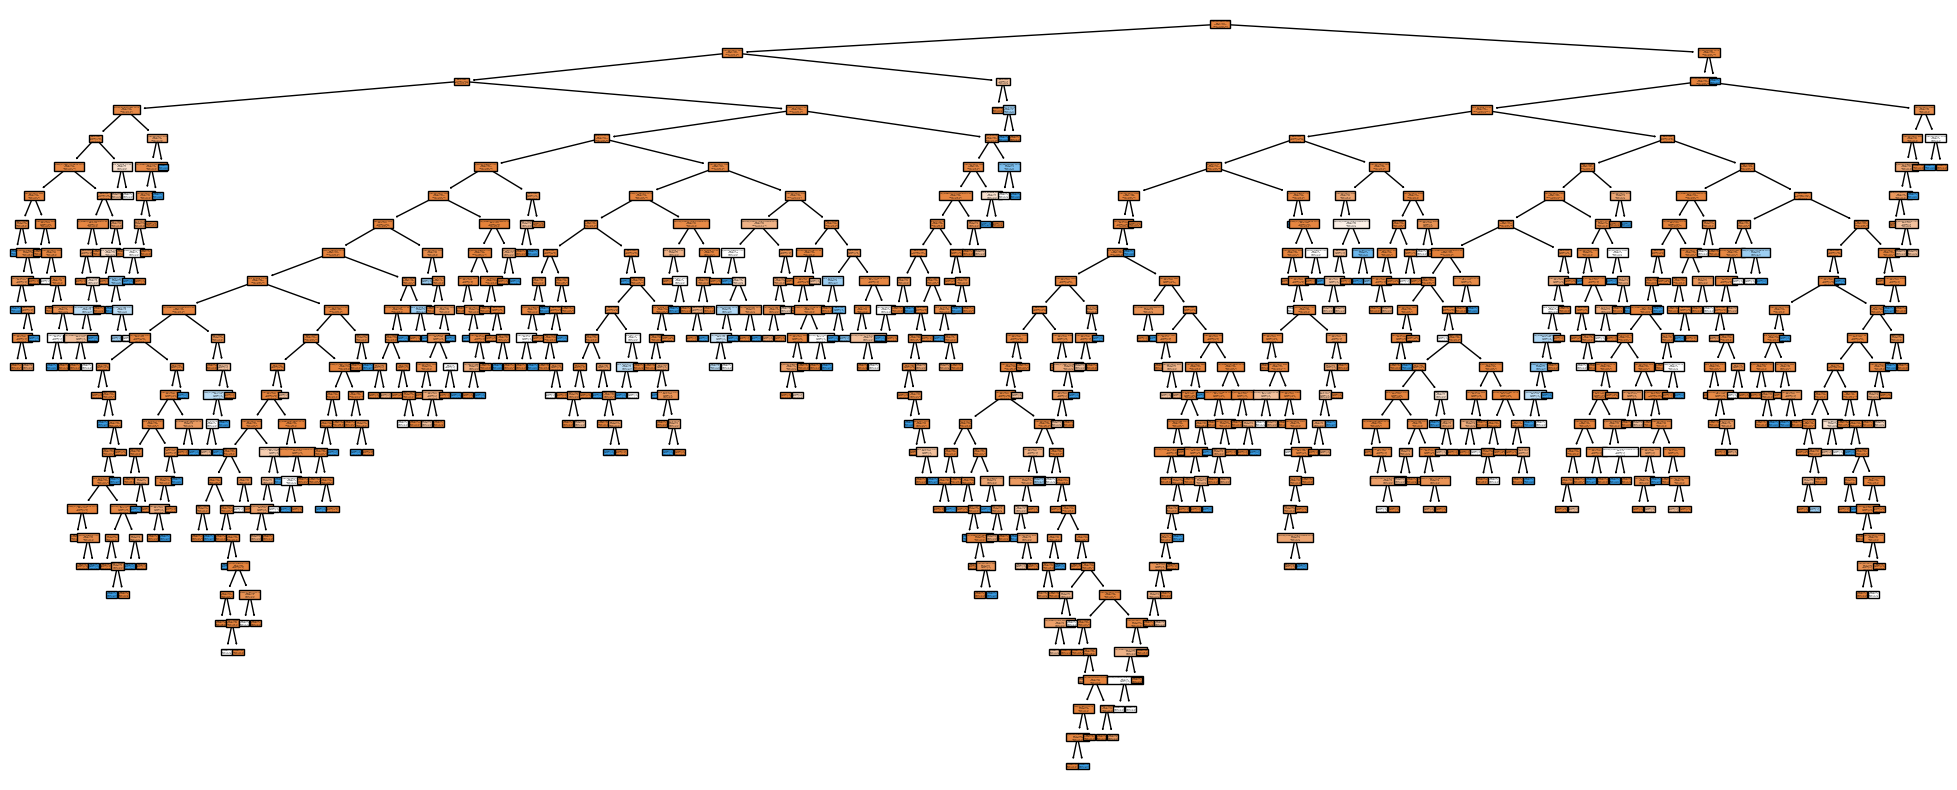

In [71]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(df_x_train, df_y_train)
plt.figure(figsize=(25, 10))
plot_tree(
    clf,
    filled=True,
    class_names=['Bom', 'Mau'],
    feature_names=list(df_x_train.columns)
)

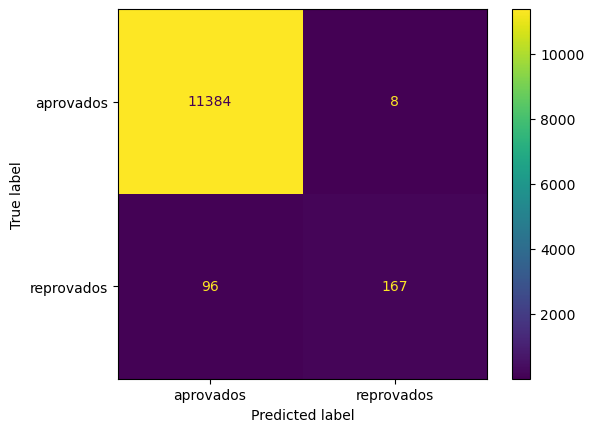

In [72]:
predict_train = clf.predict(df_x_train)
cm = confusion_matrix(df_y_train, predict_train, labels=clf.classes_)
matrizConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
matrizConfusao.plot()

In [75]:
accuracy_score(df_y_train, predict_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

[Text(0.5441476877607788, 0.9772727272727273, 'x[2] <= 2.632\ngini = 0.05\nsamples = 4995\nvalue = [4868, 127]\nclass = Bom'),
 Text(0.23993828233657857, 0.9318181818181818, 'x[1] <= 30.492\ngini = 0.077\nsamples = 1694\nvalue = [1626, 68]\nclass = Bom'),
 Text(0.06954102920723226, 0.8863636363636364, 'x[1] <= 30.378\ngini = 0.174\nsamples = 218\nvalue = [197, 21]\nclass = Bom'),
 Text(0.06397774687065369, 0.8409090909090909, 'x[2] <= 2.37\ngini = 0.153\nsamples = 215\nvalue = [197, 18]\nclass = Bom'),
 Text(0.04450625869262865, 0.7954545454545454, 'x[21] <= 0.5\ngini = 0.114\nsamples = 198\nvalue = [186, 12]\nclass = Bom'),
 Text(0.027816411682892908, 0.75, 'x[6] <= 0.5\ngini = 0.043\nsamples = 137\nvalue = [134, 3]\nclass = Bom'),
 Text(0.011126564673157162, 0.7045454545454546, 'x[12] <= 0.5\ngini = 0.016\nsamples = 123\nvalue = [122, 1]\nclass = Bom'),
 Text(0.005563282336578581, 0.6590909090909091, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]\nclass = Bom'),
 Text(0.016689847009735

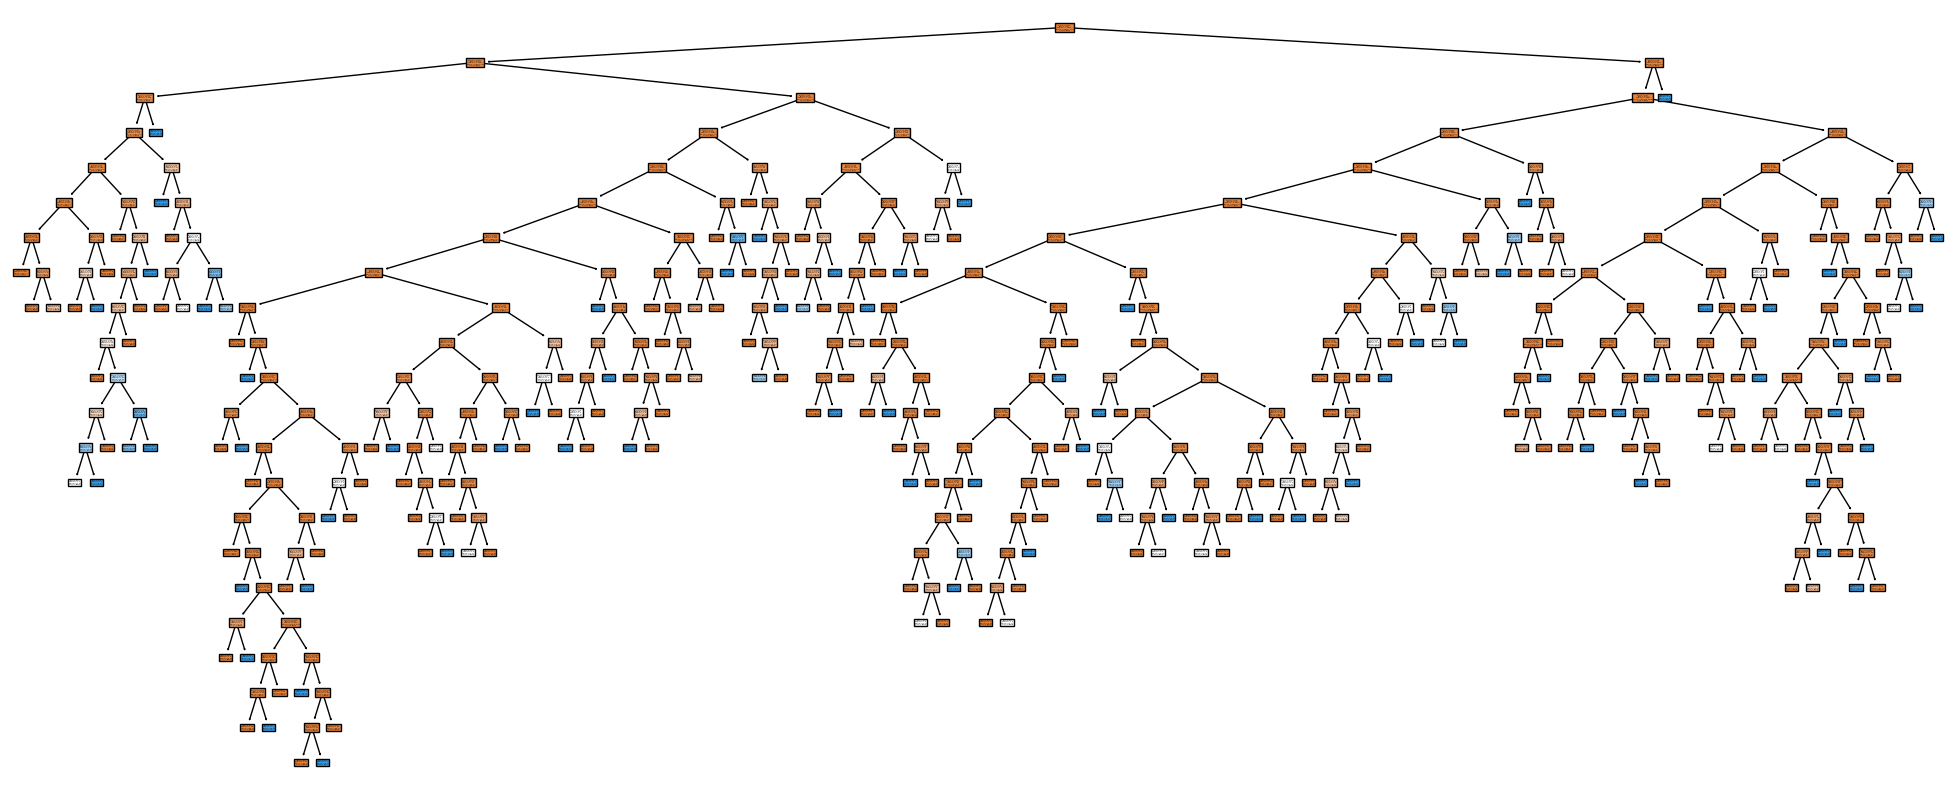

In [176]:
clf = clf.fit(df_x_test, df_y_test)
plt.figure(figsize=(25, 10))
plot_tree(
    clf,
    filled=True,
    class_names=['Bom', 'Mau'],
)

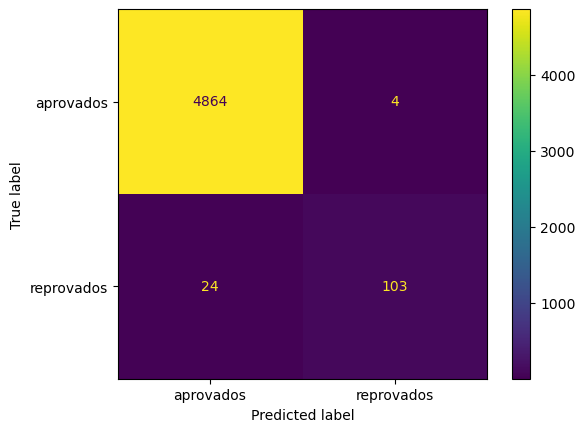

In [79]:
predict_test = clf.predict(df_x_test)
cm = confusion_matrix(df_y_test, predict_test, labels=clf.classes_)
matrizConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
matrizConfusao.plot()

In [81]:
accuracy_score(df_y_test, predict_test)

0.9943943943943944

[Text(0.5623791881443299, 0.9545454545454546, 'x[2] <= 2.632\ngini = 0.05\nsamples = 4995\nvalue = [4868, 127]\nclass = Bom'),
 Text(0.27923646907216493, 0.8636363636363636, 'x[1] <= 30.492\ngini = 0.077\nsamples = 1694\nvalue = [1626, 68]\nclass = Bom'),
 Text(0.10309278350515463, 0.7727272727272727, 'x[2] <= 2.37\ngini = 0.174\nsamples = 218\nvalue = [197, 21]\nclass = Bom'),
 Text(0.08247422680412371, 0.6818181818181818, 'x[1] <= 30.305\ngini = 0.138\nsamples = 201\nvalue = [186.0, 15.0]\nclass = Bom'),
 Text(0.07216494845360824, 0.5909090909090909, 'x[21] <= 0.5\ngini = 0.116\nsamples = 195\nvalue = [183, 12]\nclass = Bom'),
 Text(0.041237113402061855, 0.5, 'x[6] <= 0.5\ngini = 0.044\nsamples = 134\nvalue = [131, 3]\nclass = Bom'),
 Text(0.020618556701030927, 0.4090909090909091, 'x[12] <= 0.5\ngini = 0.017\nsamples = 120\nvalue = [119, 1]\nclass = Bom'),
 Text(0.010309278350515464, 0.3181818181818182, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]\nclass = Bom'),
 Text(0.030927835051

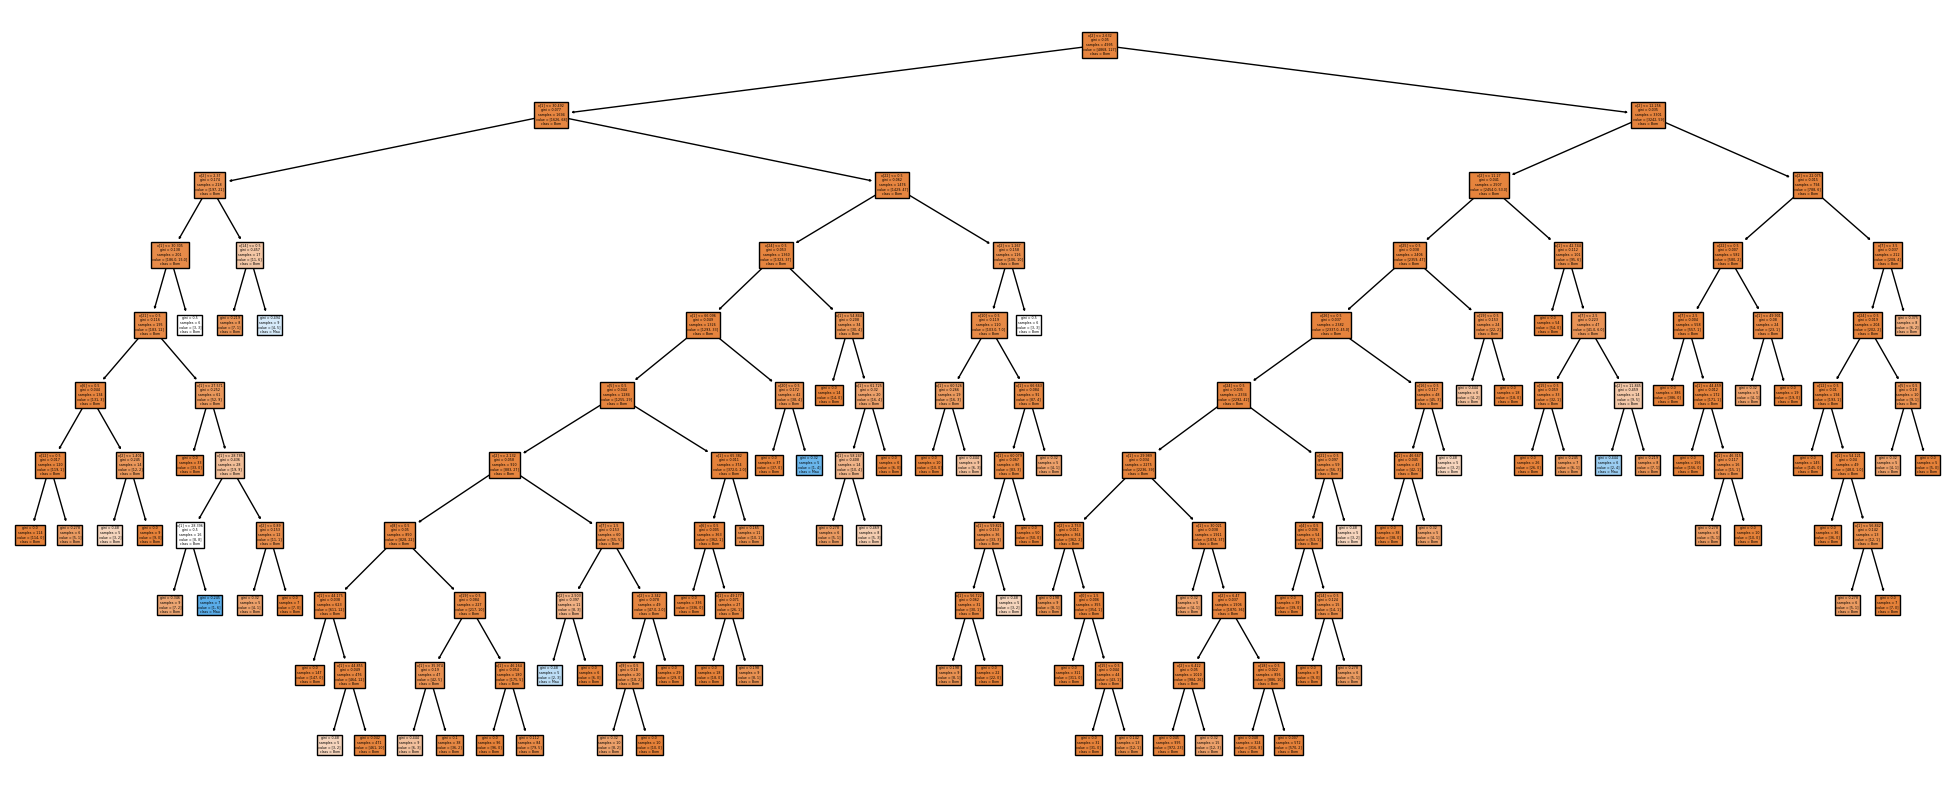

In [174]:
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf2.fit(df_x_test, df_y_test)
plt.figure(figsize=(25, 10))
plot_tree(
    clf2,
    filled=True,
    class_names=['Bom', 'Mau'],
)

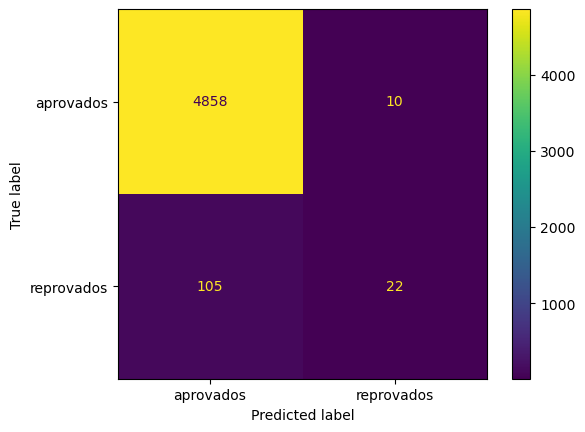

In [95]:
predict_test = clf2.predict(df_x_test)
cm = confusion_matrix(df_y_test, predict_test, labels=clf2.classes_)
matrizConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
matrizConfusao.plot()

In [168]:
df_y_bom = df_y
df_y_bom.loc[df_y_bom['mau']] = 0
df_y_bom

C:\Users\enzob\AppData\Local\Temp\ipykernel_16364\2797657380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_bom.loc[df_y_bom['mau']] = 0


,mau
0,0
1,0
2,0
3,0
4,0
...,...
16645,0
16646,0
16647,0
16648,0


In [170]:
clf3 = DecisionTreeClassifier(random_state=100)
clf3 = clf3.fit(df_x_bom_train, df_y_bom_train)

predict_bom = clf3.predict(df_x_bom_train)

In [172]:
accuracy_score(df_y_bom_train, predict_bom)

1.0